In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import ssl
import matplotlib.pyplot as plt


In [ ]:


# 定义图像预处理步骤
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 下载并加载CIFAR-10数据集
train_dataset = datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='data', train=False, download=True, transform=transform)

# 创建数据加载器
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 170498071/170498071 [00:10<00:00, 16684415.84it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
# MLP模型定义
class DeepCIFAR10MLP(nn.Module):
    def __init__(self):
        super(DeepCIFAR10MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32 * 32 * 3, 2048),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.linear_relu_stack(x)

model = DeepCIFAR10MLP()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # 调整学习率


In [ ]:
def train_model(model, train_loader, test_loader, epochs):
    train_losses = []
    test_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            pred = model(images)
            loss = loss_fn(pred, labels)
            loss.backward()
            optimizer.step()

        train_losses.append(loss.item())

        model.eval()
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for images, labels in test_loader:
                pred = model(images)
                test_loss += loss_fn(pred, labels).item()
                correct += (pred.argmax(1) == labels).type(torch.float).sum().item()

        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)
        accuracy = correct / len(test_loader.dataset)
        test_accuracies.append(accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}")

    return train_losses, test_losses, test_accuracies

# 训练模型
epochs = 50  # 训练更多的epoch
train_losses, test_losses, test_accuracies = train_model(model, train_loader, test_loader, epochs)


Epoch 1/50, Train Loss: 2.1119, Test Loss: 0.0304, Test Accuracy: 0.2798
Epoch 2/50, Train Loss: 1.8179, Test Loss: 0.0283, Test Accuracy: 0.3210
Epoch 3/50, Train Loss: 1.7451, Test Loss: 0.0273, Test Accuracy: 0.3670
Epoch 4/50, Train Loss: 1.8530, Test Loss: 0.0261, Test Accuracy: 0.3936
Epoch 5/50, Train Loss: 1.7052, Test Loss: 0.0252, Test Accuracy: 0.4325
Epoch 6/50, Train Loss: 2.0034, Test Loss: 0.0243, Test Accuracy: 0.4624
Epoch 7/50, Train Loss: 1.9873, Test Loss: 0.0239, Test Accuracy: 0.4668
Epoch 8/50, Train Loss: 1.6588, Test Loss: 0.0234, Test Accuracy: 0.4820
Epoch 9/50, Train Loss: 1.5177, Test Loss: 0.0230, Test Accuracy: 0.4914
Epoch 10/50, Train Loss: 1.3099, Test Loss: 0.0226, Test Accuracy: 0.5048
Epoch 11/50, Train Loss: 1.8580, Test Loss: 0.0225, Test Accuracy: 0.5042
Epoch 12/50, Train Loss: 1.6660, Test Loss: 0.0222, Test Accuracy: 0.5080
Epoch 13/50, Train Loss: 1.6345, Test Loss: 0.0221, Test Accuracy: 0.5109
Epoch 14/50, Train Loss: 1.2063, Test Loss: 0.0

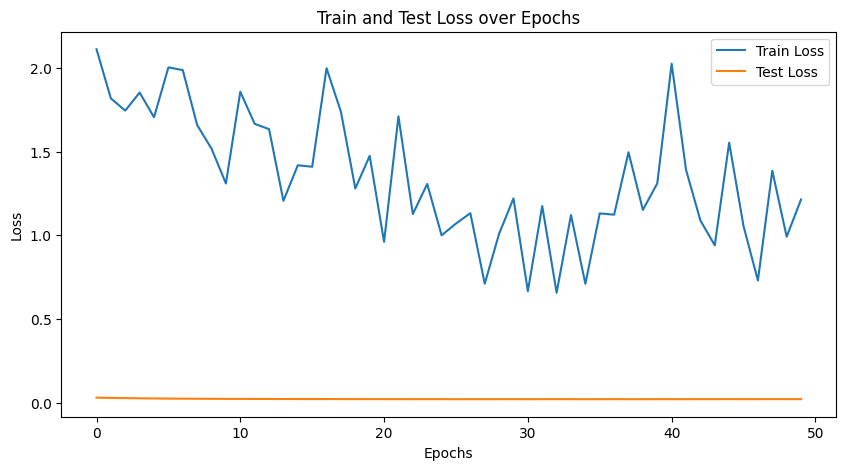

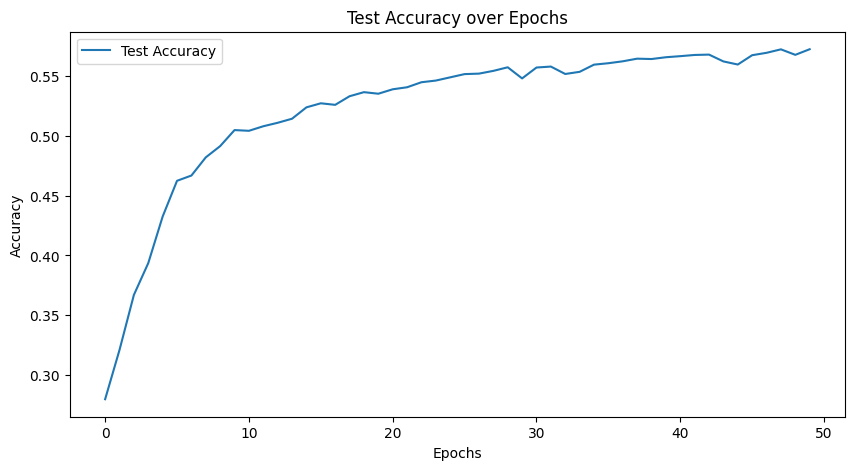

In [ ]:
# 绘制训练和测试损失
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Test Loss over Epochs')
plt.savefig('train_test_loss_cifar10_deep.png')

# 绘制测试集准确率
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Test Accuracy over Epochs')
plt.savefig('test_accuracy_cifar10_deep.png')
plt.show()